In [ ]:
# date:20/08/25                                                                                                                                                                                                    #day:Wednesday
# Lab


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
#1 load and preprocess MNIST dataset
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
#Normalize the pixel values to [0,1]
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0
# Flattern 28*28 image into vectors of size 784
x_train=x_train.reshape(-1,784)
x_test=x_test.reshape(-1,784)

In [ ]:
#2 Define MLP model
model=models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [ ]:
#3 compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
#4 Train the model
history=model.fit(x_train,y_train,
                  validation_split=0.2,
                  epochs=10,
                  batch_size=64,
                  verbose=1)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8420 - loss: 0.5574 - val_accuracy: 0.9521 - val_loss: 0.1621
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9579 - loss: 0.1396 - val_accuracy: 0.9649 - val_loss: 0.1187
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9737 - loss: 0.0910 - val_accuracy: 0.9668 - val_loss: 0.1053
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9798 - loss: 0.0701 - val_accuracy: 0.9707 - val_loss: 0.0962
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9828 - loss: 0.0544 - val_accuracy: 0.9698 - val_loss: 0.0960
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9886 - loss: 0.0374 - val_accuracy: 0.9715 - val_loss: 0.0915
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9898 - loss: 0.0312 - val_accuracy: 0.9735 - val_loss: 0.0922
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9922 - loss: 0.0246 - val_accuracy: 0.

In [ ]:
#5 Evaluate of test set
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=0)
print(f'Test Accuracy:{test_acc:.4f}')
print(f'Test Loss:{test_loss:.4f}')

Test Accuracy:0.9761
Test Loss:0.0896


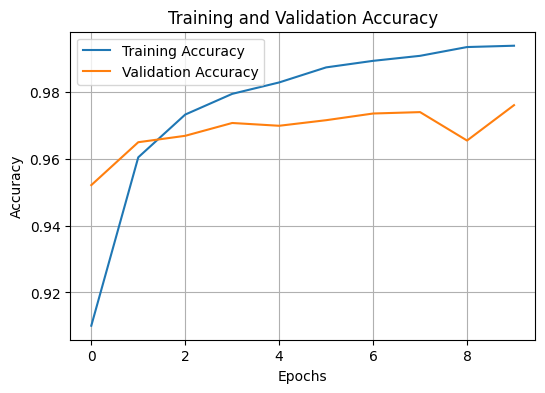

In [ ]:
#6 plot accuracy curves
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training and Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

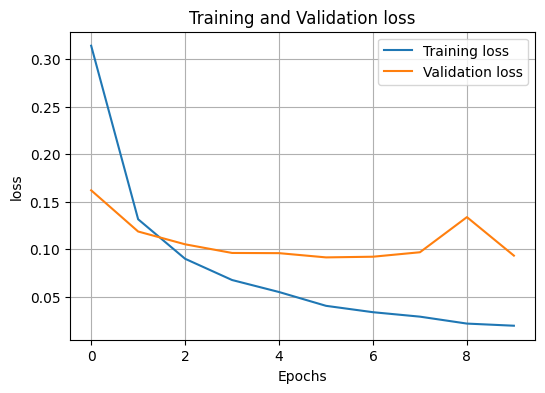

In [ ]:
#7 plot loss curves
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title("Training and Validation loss")
plt.legend()
plt.grid(True)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


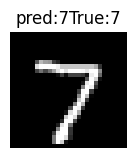

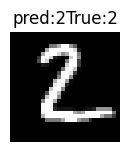

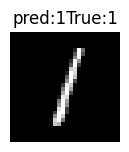

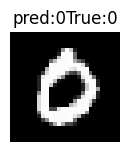

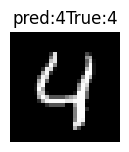

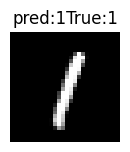

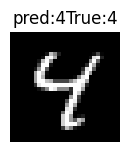

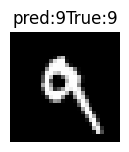

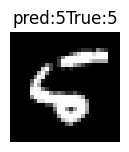

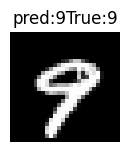

In [ ]:
#8 Make predictions and display some results
import numpy as np
predictions=model.predict(x_test)
pred_labels=np.argmax(predictions,axis=1)
#show first 10 images, predict labels,and true labels
plt.figure(figsize=(10,3))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(x_test[i].reshape(28,28),cmap='gray')
  plt.title(f"pred:{pred_labels[i]}True:{y_test[i]}")
  plt.axis('off')
  plt.tight_layout()
  plt.show()